![Scatter Plot Gapminder 1960-2100](output_test.gif)

### 0) Goal
- Recreate Hans Rosling's Scatterplot from his Talk at TED2006 within matplotlib

### 1) Data Wrangling

In [1]:
# Import libraries

import pandas as pd
import numpy as np

In [2]:
# Load data from gapminder.org/data (data and projections 1800-2100)

fert = pd.read_csv("sources/children_per_woman_total_fertility.csv", index_col=0)
life = pd.read_csv("sources/life_expectancy_years.csv", index_col=0)
pop = pd.read_csv("sources/population_total.csv", index_col=0)
pop

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,76600000,76400000,76300000,76100000,76000000,75800000,75600000,75400000,75200000,74900000
Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,416000,...,1330000,1300000,1270000,1250000,1220000,1190000,1170000,1140000,1110000,1090000
Algeria,2500000,2510000,2520000,2530000,2540000,2550000,2560000,2560000,2570000,2580000,...,70400000,70500000,70500000,70600000,70700000,70700000,70700000,70700000,70700000,70700000
Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63000,62900,62900,62800,62700,62700,62600,62500,62500,62400
Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,168000000,170000000,172000000,175000000,177000000,179000000,182000000,184000000,186000000,188000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,1000000,978000,957000,936000,916000,896000,876000,857000,838000,820000,...,35500000,35400000,35200000,35100000,35000000,34800000,34700000,34500000,34400000,34200000
Vietnam,4000000,4100000,4200000,4310000,4410000,4530000,4640000,4750000,4870000,4990000,...,100000000,100000000,99700000,99400000,99100000,98800000,98400000,98100000,97800000,97400000
Yemen,2590000,2590000,2590000,2590000,2590000,2590000,2590000,2590000,2590000,2590000,...,54500000,54400000,54300000,54100000,54000000,53800000,53700000,53500000,53400000,53200000


In [3]:
# Load country to region map from Gapminder's population indicator version 6
# (https://www.gapminder.org/data/documentation/gd003/)

ccmap = pd.read_csv("sources/country-to-regions-map.csv", index_col=1)
ccmap

,geo,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,World bank income group 2017,geo.1
name,,,,,,,,,,,
Afghanistan,afg,asia,asia_west,south_asia,g77,33.00000,66.00000,19/11/1946,South Asia,Low income,afg
Albania,alb,europe,europe_east,europe_central_asia,others,41.00000,20.00000,14/12/1955,Europe & Central Asia,Upper middle income,alb
Algeria,dza,africa,africa_north,middle_east_north_africa,g77,28.00000,3.00000,8/10/1962,Middle East & North Africa,Upper middle income,dza
Andorra,and,europe,europe_west,europe_central_asia,others,42.50779,1.52109,28/7/1993,Europe & Central Asia,High income,and
Angola,ago,africa,africa_sub_saharan,sub_saharan_africa,g77,-12.50000,18.50000,1/12/1976,Sub-Saharan Africa,Lower middle income,ago
...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,vnm,asia,east_asia_pacific,east_asia_pacific,g77,16.16667,107.83333,20/9/1977,East Asia & Pacific,Lower middle income,vnm
Yemen,yem,asia,asia_west,middle_east_north_africa,g77,15.50000,47.50000,30/9/1947,Middle East & North Africa,Lower middle income,yem
Zambia,zmb,africa,africa_sub_saharan,sub_saharan_africa,g77,-14.33333,28.50000,1/12/1964,Sub-Saharan Africa,Lower middle income,zmb


In [4]:
# Drop unneeded columns from ccmap

col_to_del = ["geo", "Latitude", "Longitude", "UN member since", "geo.1"]
ccmap = ccmap.drop(columns=col_to_del)
ccmap

,four_regions,eight_regions,six_regions,members_oecd_g77,World bank region,World bank income group 2017
name,,,,,,
Afghanistan,asia,asia_west,south_asia,g77,South Asia,Low income
Albania,europe,europe_east,europe_central_asia,others,Europe & Central Asia,Upper middle income
Algeria,africa,africa_north,middle_east_north_africa,g77,Middle East & North Africa,Upper middle income
Andorra,europe,europe_west,europe_central_asia,others,Europe & Central Asia,High income
Angola,africa,africa_sub_saharan,sub_saharan_africa,g77,Sub-Saharan Africa,Lower middle income
...,...,...,...,...,...,...
Vietnam,asia,east_asia_pacific,east_asia_pacific,g77,East Asia & Pacific,Lower middle income
Yemen,asia,asia_west,middle_east_north_africa,g77,Middle East & North Africa,Lower middle income
Zambia,africa,africa_sub_saharan,sub_saharan_africa,g77,Sub-Saharan Africa,Lower middle income


In [5]:
# Inspect shape

fert.shape, life.shape, pop.shape, ccmap.shape

((184, 301), (187, 301), (195, 301), (197, 6))

In [6]:
# Create wide tables with hierarchical indices (country, year)
# Converting pd.DataFrames into pd.Series

sfert = fert.stack()
slife = life.stack()
spop = pop.stack()

sfert.head(), slife.head(), spop.head()

(country          
 Afghanistan  1800    7.0
              1801    7.0
              1802    7.0
              1803    7.0
              1804    7.0
 dtype: float64,
 country          
 Afghanistan  1800    28.2
              1801    28.2
              1802    28.2
              1803    28.2
              1804    28.2
 dtype: float64,
 country          
 Afghanistan  1800    3280000
              1801    3280000
              1802    3280000
              1803    3280000
              1804    3280000
 dtype: int64)

In [7]:
# Put Series' together in one DataFrame

d = {"fertility": sfert, "lifeexp": slife, "population": spop}
df = pd.DataFrame(data=d)
df

fertility  lifeexp  population
country                                         
Afghanistan 1800       7.00     28.2     3280000
            1801       7.00     28.2     3280000
            1802       7.00     28.2     3280000
            1803       7.00     28.2     3280000
            1804       7.00     28.2     3280000
...                     ...      ...         ...
Zimbabwe    2096       1.84     75.1    30900000
            2097       1.83     75.3    31000000
            2098       1.83     75.4    31000000
            2099       1.83     75.5    31000000
            2100       1.83     75.7    31000000

[58695 rows x 3 columns]

In [8]:
# Show population in millions

df["pop_in_mill"] = df["population"] / 1000000
df = df.drop(columns=["population"])
df

fertility  lifeexp  pop_in_mill
country                                          
Afghanistan 1800       7.00     28.2         3.28
            1801       7.00     28.2         3.28
            1802       7.00     28.2         3.28
            1803       7.00     28.2         3.28
            1804       7.00     28.2         3.28
...                     ...      ...          ...
Zimbabwe    2096       1.84     75.1        30.90
            2097       1.83     75.3        31.00
            2098       1.83     75.4        31.00
            2099       1.83     75.5        31.00
            2100       1.83     75.7        31.00

[58695 rows x 3 columns]

In [9]:
# Transform table into desired format for example plot

df2 = df.stack()  # Create Series with three indices (country, year, indicators)
df3 = df2.unstack(1)  # Create DataFrame with years as columns
df3 = df3["1950"]  # Create Series by selecting desired column ('1950')
df3 = df3.unstack(1)  # Create DataFrame with indicators as cols
df3

,fertility,lifeexp,pop_in_mill
country,,,
Afghanistan,7.57,32.5,7.7500
Albania,5.87,54.1,1.2600
Algeria,7.49,47.3,8.8700
Andorra,NaN,NaN,0.0062
Angola,7.11,35.2,4.5500
...,...,...,...
Venezuela,6.54,55.0,5.4800
Vietnam,4.96,48.2,24.8000
Yemen,7.32,23.8,4.6600


In [10]:
# Merge DataFrame with country to region map for colormapping later

df4 = pd.merge(df3, ccmap, left_on="country", right_on=ccmap.index)
df4 = df4.set_index("country")
df4

,fertility,lifeexp,pop_in_mill,four_regions,eight_regions,six_regions,members_oecd_g77,World bank region,World bank income group 2017
country,,,,,,,,,
Afghanistan,7.57,32.5,7.7500,asia,asia_west,south_asia,g77,South Asia,Low income
Albania,5.87,54.1,1.2600,europe,europe_east,europe_central_asia,others,Europe & Central Asia,Upper middle income
Algeria,7.49,47.3,8.8700,africa,africa_north,middle_east_north_africa,g77,Middle East & North Africa,Upper middle income
Andorra,NaN,NaN,0.0062,europe,europe_west,europe_central_asia,others,Europe & Central Asia,High income
Angola,7.11,35.2,4.5500,africa,africa_sub_saharan,sub_saharan_africa,g77,Sub-Saharan Africa,Lower middle income
...,...,...,...,...,...,...,...,...,...
Venezuela,6.54,55.0,5.4800,americas,america_south,america,g77,Latin America & Caribbean,Upper middle income
Vietnam,4.96,48.2,24.8000,asia,east_asia_pacific,east_asia_pacific,g77,East Asia & Pacific,Lower middle income
Yemen,7.32,23.8,4.6600,asia,asia_west,middle_east_north_africa,g77,Middle East & North Africa,Lower middle income


### 2) Plotting

In [11]:
# Import libraries for plotting
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

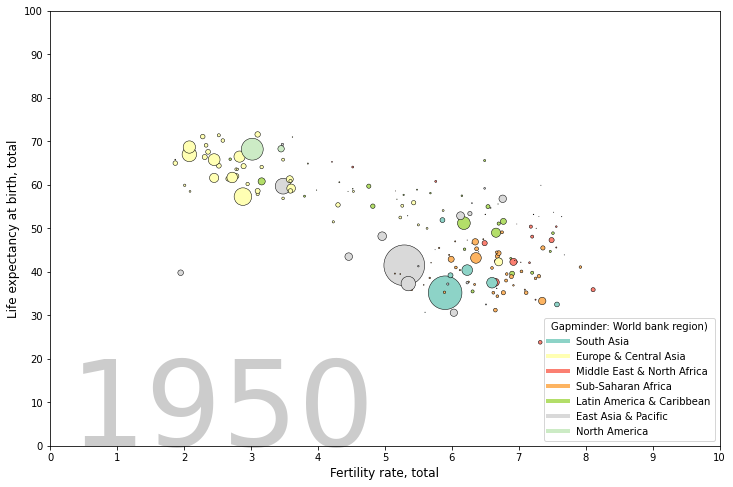

In [12]:
# Test plot for single year

# Create color map for plot
color_labels = df4["World bank region"].unique()
colors = plt.get_cmap("Set3", lut=len(color_labels)).colors  # np.array of rgba values
color_map = dict(zip(color_labels, colors))  # dict {region name: rgba value, ...}

# Create figure and scatterplot
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(
    x=df4["fertility"],
    y=df4["lifeexp"],
    s=df4["pop_in_mill"] * 3,
    c=df4["World bank region"].map(color_map),
    edgecolor="black",
    linewidth=0.5,
)  # set linewidth and edgecolor for marker edge
ax.set_xlabel("Fertility rate, total", fontsize=12)
ax.set_ylabel("Life expectancy at birth, total", fontsize=12)
ax.set_xticks(np.arange(0, 11, 1))  # Fix ticks, so they don't jump around in gif
ax.set_yticks(np.arange(0, 110, 10))
ax.text(0.3, 0, "1950", fontsize=120, alpha=0.2)  # Add year to lower right

# Create custom legend
custom_lines = []
for j in range(len(color_labels) - 1):
    custom_lines.append(
        Line2D([0], [0], color=colors[j], lw=4)
    )  # Create list with colored lines for legend
ax.legend(
    custom_lines,
    color_labels,
    loc="lower right",
    title=f"Gapminder: World bank region)",
)

3) CREATING ANIMATION

In [13]:
# Prepare settings and plot for final animated gif

# SETTINGS
# data
START = 1960  # possible timeframes between 1800-2100
END = 2100
REGIONS = "World bank region"  # 'four_regions', 'World bank region', 'World bank income group 2017'

# aesthetics
STYLE_SHEET = "seaborn-white"  # before changed, restart kernel to avoid glitches
COLORMAP = "Set3"  # 'Pastel1', 'Accent', 'Dark2', 'Set1', 'Set3', 'tab10', 'tab20'
FIGSIZE = (12, 8)


# PLOTTING

plt.style.use(STYLE_SHEET)  # Set general style

dff = df2.unstack(1)  # Repeat table transformation from above

for i in range(START, END + 1):
    # Prepare dataframe
    dfff = dff[str(i)]
    dfff = dfff.unstack(1)
    df_final = pd.merge(dfff, ccmap, left_on="country", right_on=ccmap.index)
    df_final = df_final.set_index("country")

    # Create color map for plot
    color_labels = df_final[REGIONS].unique()
    colors = plt.get_cmap(COLORMAP, lut=len(color_labels)).colors  # array of rgba
    color_map = dict(zip(color_labels, colors))  # dict {region name: rgba values, ...}

    # Create figure and scatterplot
    fig, ax = plt.subplots(figsize=FIGSIZE)
    ax.scatter(
        x=df_final["fertility"],
        y=df_final["lifeexp"],
        s=df_final["pop_in_mill"] * 3,
        c=df_final[REGIONS].map(color_map),
        edgecolor="black",
        linewidth=0.5,
    )
    ax.set_xlabel("Fertility rate, total", fontsize=12)
    ax.set_ylabel("Life expectancy at birth, total", fontsize=12)
    ax.set_xticks(np.arange(0, 11, 1))  # Fix ticks, so they don't jump around
    ax.set_yticks(np.arange(0, 110, 10))
    ax.text(0.3, 0, f"{i}", fontsize=120, alpha=0.2)  # Add year to lower right

    # Create custom legend
    custom_lines = []
    for j in range(len(color_labels) - 1):
        custom_lines.append(Line2D([0], [0], color=colors[j], lw=4))
    ax.legend(
        custom_lines, color_labels, loc="lower right", title=f"Gapminder: {REGIONS}"
    )

    # Save and close plot
    plt.savefig(f"scatter_images_gm/{i}.png")
    plt.close()

In [14]:
# Make gif

import imageio

images = []

for i in range(1960, 2101):
    filename = f'scatter_images_gm/{i}.png'
    images.append(imageio.imread(filename))

imageio.mimsave('output_gm.gif', images, fps=10)

![Scatter Plot Gapminder 1960-2100](output_test.gif)